In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ushape.csv",header=None)
# df=pd.read_csv("ushape.csv",header=None,names=['X','Y','class'])

In [3]:
df=df.round(4)  # round of four place 
df.columns = ['X', 'Y', 'class']


In [4]:
df.head(5)

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1151,-0.0462,1.0
2,0.8825,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8295,-0.5393,1.0


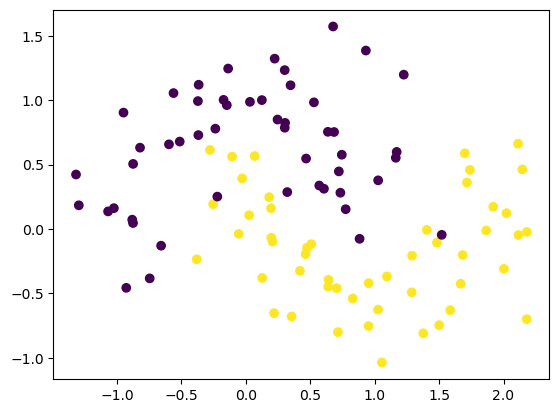

In [5]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

c:\Users\rosha\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [24]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# set parameters to 0
model.get_weights()

[array([[ 0.62579256,  0.17899531,  0.663243  , -0.12495953, -0.3954863 ,
         -0.18571806,  0.40325397, -0.24142286, -0.24313623,  0.07136691],
        [ 0.12642908,  0.00979495,  0.02285945, -0.61850905,  0.6135252 ,
         -0.3743397 ,  0.5800964 , -0.1304546 , -0.12615699, -0.03912574]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.02020627, -0.5047565 ,  0.53616107,  0.05207521,  0.49669027,
          0.5053543 , -0.18827859,  0.06813061, -0.09913126,  0.3074844 ],
        [ 0.30393082, -0.29485986,  0.14117002, -0.5095612 ,  0.3270176 ,
         -0.23420534, -0.42338526, -0.20985734,  0.03917867, -0.29695746],
        [ 0.09597576, -0.35961115,  0.41945195, -0.11399809, -0.23711914,
          0.37216878, -0.49325687, -0.18783772, -0.35736778, -0.12506169],
        [ 0.04545993,  0.35098666, -0.35226274,  0.00906473, -0.005867  ,
         -0.02058589, -0.04169583, -0.03443325,  0.16935378, -0.08608273],
        [ 0.07978

In [26]:
initial_weights=model.get_weights()

In [27]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)

initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)

initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)

initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)


In [28]:
model.set_weights(initial_weights)

In [29]:
model.get_weights()

[array([[-0.44056585, -0.44748902,  0.3855299 , -0.03059047,  0.45911738,
          1.9254017 ,  0.41702303,  0.6897141 , -0.69512504, -0.35544762],
        [ 0.8084412 , -0.04175951,  1.2651435 ,  1.2379183 , -0.47210923,
          0.25250214, -1.1670034 , -0.43886998, -0.33420727, -0.36129484]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.55613214,  0.4785106 , -0.6729413 ,  0.00313069,  0.24369422,
          0.33258522, -0.4496415 ,  0.26444715,  0.5859445 , -0.07790302],
        [ 0.03732845,  0.3355028 , -0.44132468, -0.01694565,  0.40833595,
         -0.31308118,  0.07527709,  0.1004917 ,  0.40035015, -0.27007732],
        [-0.24443942,  0.27475187, -0.05383734, -0.12752941,  0.04667365,
          0.00234882,  0.49239233, -0.04973738,  0.75487363,  0.1317313 ],
        [ 0.4085991 ,  0.26303366, -0.08569758, -0.30436814, -0.07281131,
          0.20041758, -0.00862059, -0.3210225 , -0.05212014, -0.27670124],
        [ 0.36051

In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.5000 - loss: 0.6643 - val_accuracy: 0.5500 - val_loss: 0.6483
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6250 - loss: 0.6576 - val_accuracy: 0.7500 - val_loss: 0.6397
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7125 - loss: 0.6500 - val_accuracy: 0.8500 - val_loss: 0.6309
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.6426 - val_accuracy: 0.8500 - val_loss: 0.6225
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7875 - loss: 0.6354 - val_accuracy: 0.9000 - val_loss: 0.6146
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8000 - loss: 0.6275 - val_accuracy: 0.9000 - val_loss: 0.6070
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8375 - loss: 0.6195 - val_accuracy: 0.9000 - val_loss: 0.5986
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8500 - loss: 0.6116 - val_accuracy: 0.9000 - val_loss

In [32]:
model.get_weights()

[array([[-0.26201665, -0.6574746 ,  0.3855461 , -0.0583721 ,  0.48227283,
          2.0853276 ,  0.58620274,  0.72747904, -0.90325856, -0.6109636 ],
        [ 0.97053903,  0.01322833,  1.4306475 ,  1.3031489 , -0.7133954 ,
          0.02192507, -1.4598486 , -0.6782623 , -0.27227935, -0.19718271]],
       dtype=float32),
 array([ 0.11710367, -0.07690466,  0.10840086, -0.02733531,  0.09101801,
         0.03785485,  0.20241779, -0.14905716,  0.0158587 , -0.04990886],
       dtype=float32),
 array([[-7.83281267e-01,  5.86580813e-01, -5.24233282e-01,
          1.92255497e-01,  3.62036109e-01,  4.52065140e-01,
         -4.11668509e-01,  2.64447153e-01,  6.04325712e-01,
          8.34373087e-02],
        [ 3.65822650e-02,  5.41690469e-01, -2.29630664e-01,
          2.10140303e-01,  6.48908377e-01, -1.09884165e-01,
         -1.20921940e-01,  1.00491703e-01,  5.68367839e-01,
         -1.68552548e-01],
        [-4.16057795e-01,  3.89538676e-01, -1.57647043e-01,
         -1.94555447e-01,  2.03254

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 654us/step


<Axes: >

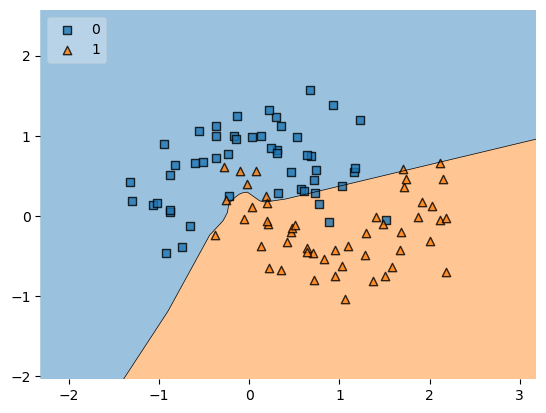

In [33]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)